In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 6a
def g(x, y):
    return x**2 + y**4

def grad_g(x, y):
    return np.array([
        2*x ,
        4*y**3
    ])


def accelerated_gradient_descent(grad, learning_rate, x0, N, epsilon):
    x_prev = x0
    x = x0
    x_list = [x]
    i = 0
    while i < N:
        y = x + (i - 1) / (i + 2) * (x - x_prev)
        x_new = y - learning_rate * grad(y[0], y[1])
        if np.linalg.norm(grad(x_new[0], x_new[1])) < epsilon:
            print("Found minimum.")
            x_list.append(x_new)
            return x_list, i
        x_prev = x
        x = x_new
        x_list.append(x)
        i += 1
    print("Accelerated gradient descent did not converge after", N, "iterations.")
    return x_list, i

x0 = np.array([1, 1])
learning_rate = 0.1
N = 1000
epsilon = 1e-5


(w, i) = accelerated_gradient_descent(grad_g, learning_rate, x0, N, epsilon)

print(f"Solution = {w[-1]}, g(x,y) = {g(w[-1][0], w[-1][1])}, iterations = {i}")



Found minimum.
Solution = [4.22286224e-07 1.34598399e-02], g(x,y) = 3.282176494891117e-08, iterations = 84


Text(0.5, 1.0, '$g(x,y) = x^2 + y^4$')

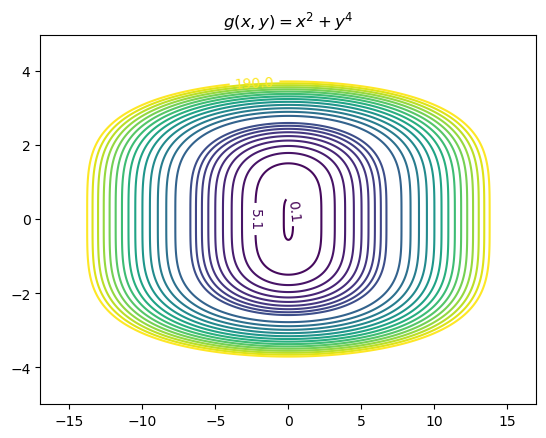

In [3]:
delta = 0.025
x = np.arange(-17.0, 17.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**4

plt.figure()
CS = plt.contour(X, Y, Z, np.concatenate((np.arange(0.1, 50, 5), np.arange(60, 200, 10))))
manual_locations = [(-4, 15), (-2, 0), ( 1, .25)]
plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
plt.title('$g(x,y) = x^2 + y^4$')

In [4]:
# 6b
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 

w0 = np.array([1, 1])
def save_gif_6b(eta):
    w, it = accelerated_gradient_descent(grad_g, learning_rate = eta, x0 = w0, N = 100, epsilon = 1e-5)
    print(it)
    fig, ax = plt.subplots(figsize=(10,10))    
    plt.cla()
    plt.axis([-6, 5, -20, 15])
    x0 = np.linspace(0, 1, 2, endpoint=True)
    title = '$f(x, y) = x^2 + y^4$'

    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(X, Y, Z, np.concatenate((np.arange(0.1, 50, 5), np.arange(60, 200, 10))))
            manual_locations = [(-4, 15), (-2, 0), ( 1, .25)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')

        animlist = plt.plot(w[ii][0], w[ii][1], 'ro') 
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.5f' % np.linalg.norm(grad_g(w[ii][0], w[ii][1]))
        plt.title(f'$g(x, y) = x^2 + y^4$ with w0 = {w0}, N = 100')
        ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = 'img6b_' + str(eta) + '.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')


MovieWriter imagemagick unavailable; using Pillow instead.


Accelerated gradient descent did not converge after 100 iterations.
100


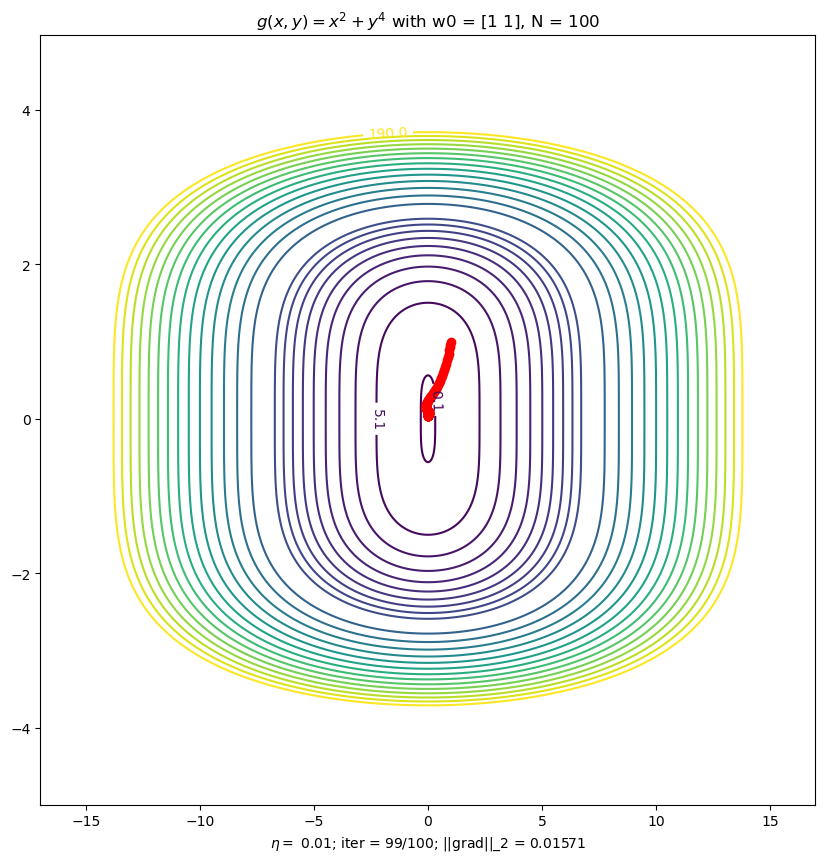

In [5]:
save_gif_6b(0.01)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Accelerated gradient descent did not converge after 100 iterations.
100


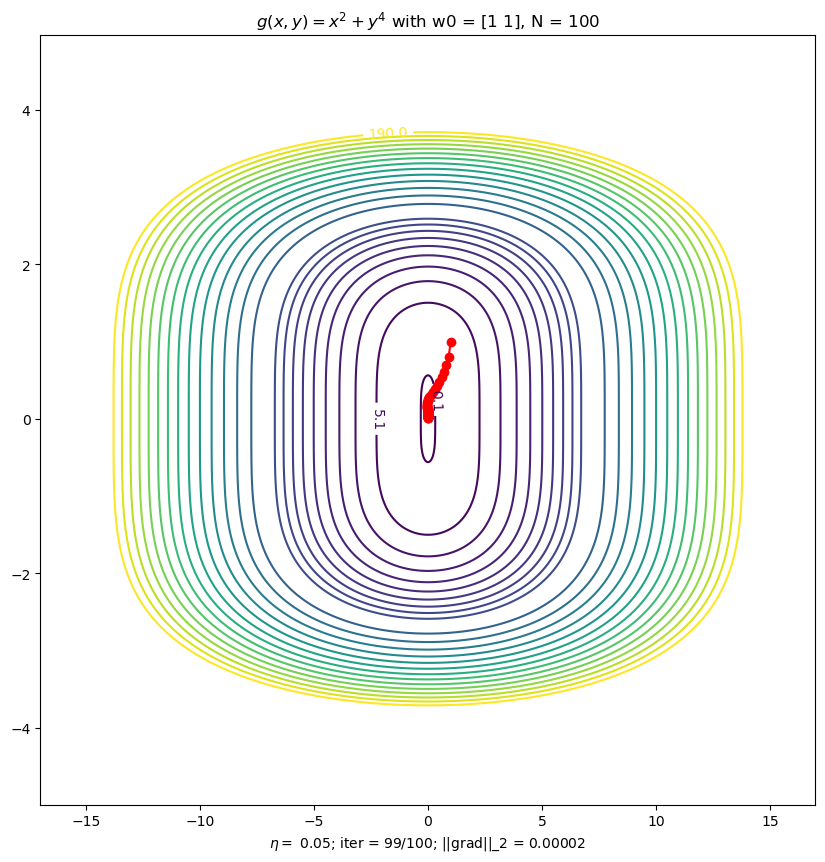

In [6]:
save_gif_6b(0.05)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Found minimum.
84


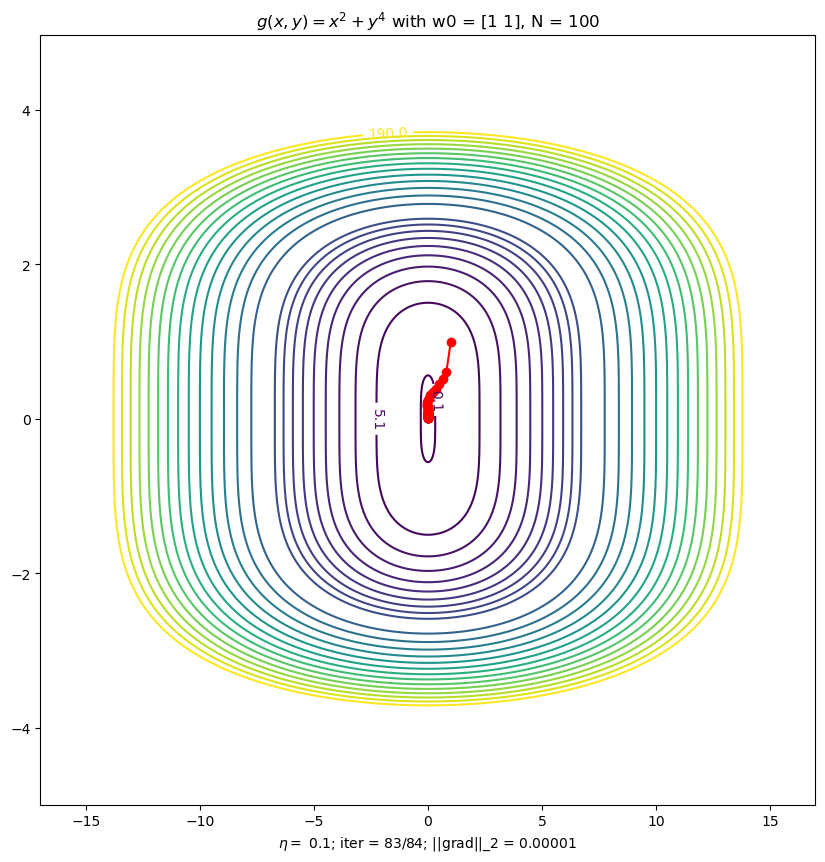

In [7]:
save_gif_6b(0.1)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Found minimum.
57


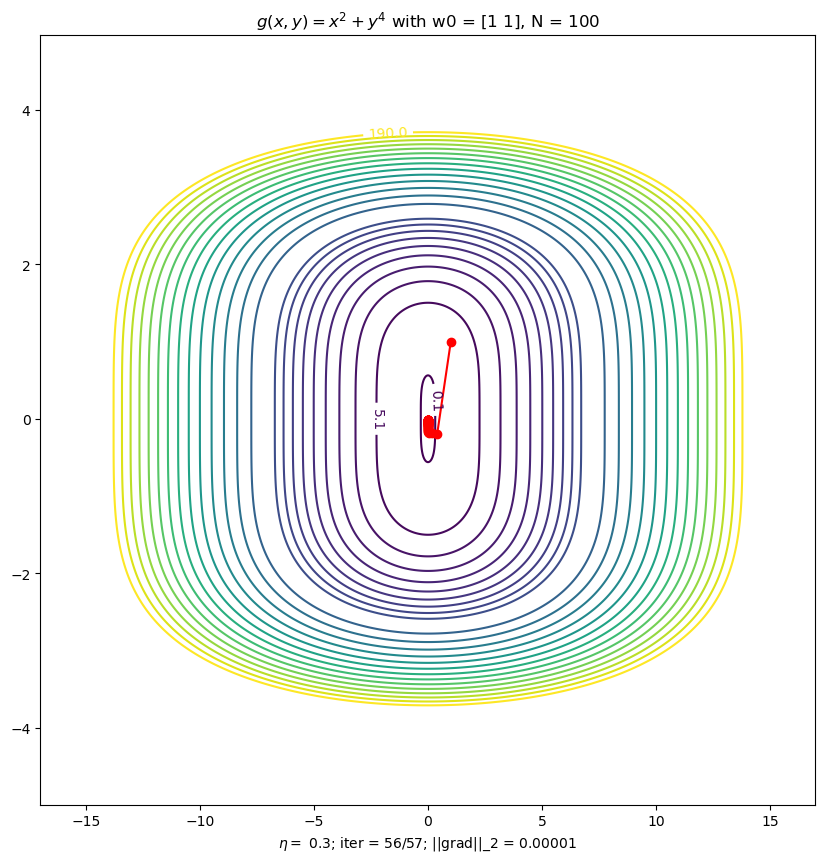

In [8]:
save_gif_6b(0.3)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Found minimum.
70


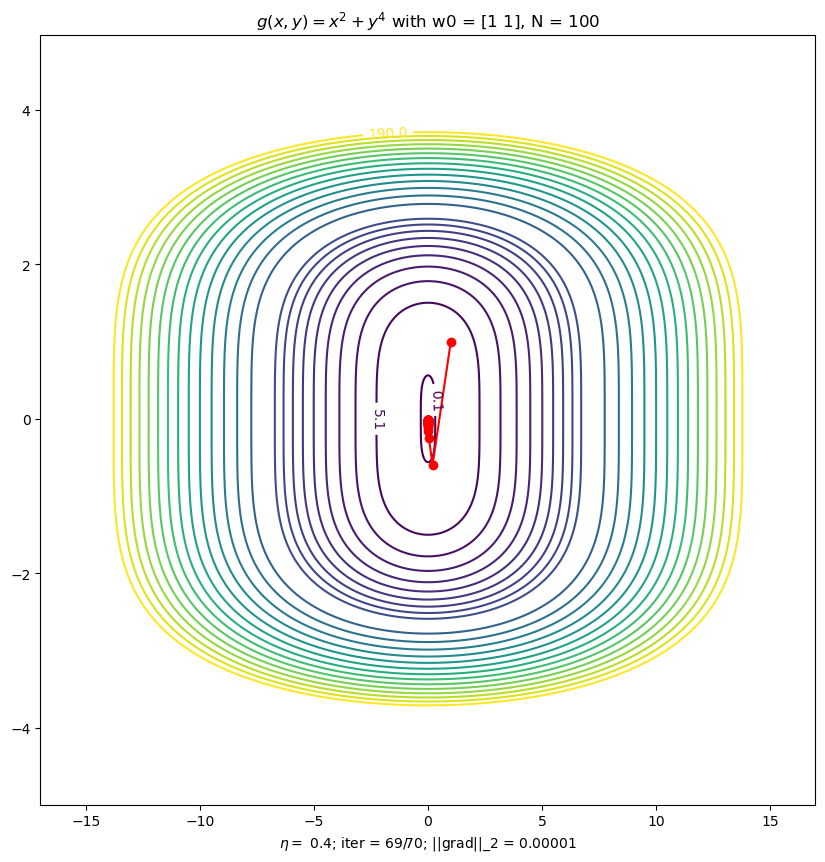

In [21]:
save_gif_6b(0.4)
plt.show()

In [15]:
# 6c
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 

def save_gif_6c(w_init):
    w, it = accelerated_gradient_descent(grad_g, learning_rate = 0.1, x0 = w_init, N = 100, epsilon = 1e-5)
    print(it)
    fig, ax = plt.subplots(figsize=(10,10))    
    plt.cla()
    plt.axis([-6, 5, -20, 15])
    x0 = np.linspace(0, 1, 2, endpoint=True)

    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(X, Y, Z, np.concatenate((np.arange(0.1, 50, 5), np.arange(60, 200, 10))))
            manual_locations = [(-4, 15), (-2, 0), ( 1, .25)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro') 
        xlabel = 'w_init =  ' + str(w_init) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.5f' % np.linalg.norm(grad_g(w[ii][0], w[ii][1]))
        plt.title(f'$g(x, y) = x^2 + y^4$ with $\eta = 0.1$, N = 100')
        ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = 'img6c_' + str(w_init) + '.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')


MovieWriter imagemagick unavailable; using Pillow instead.


Found minimum.
84


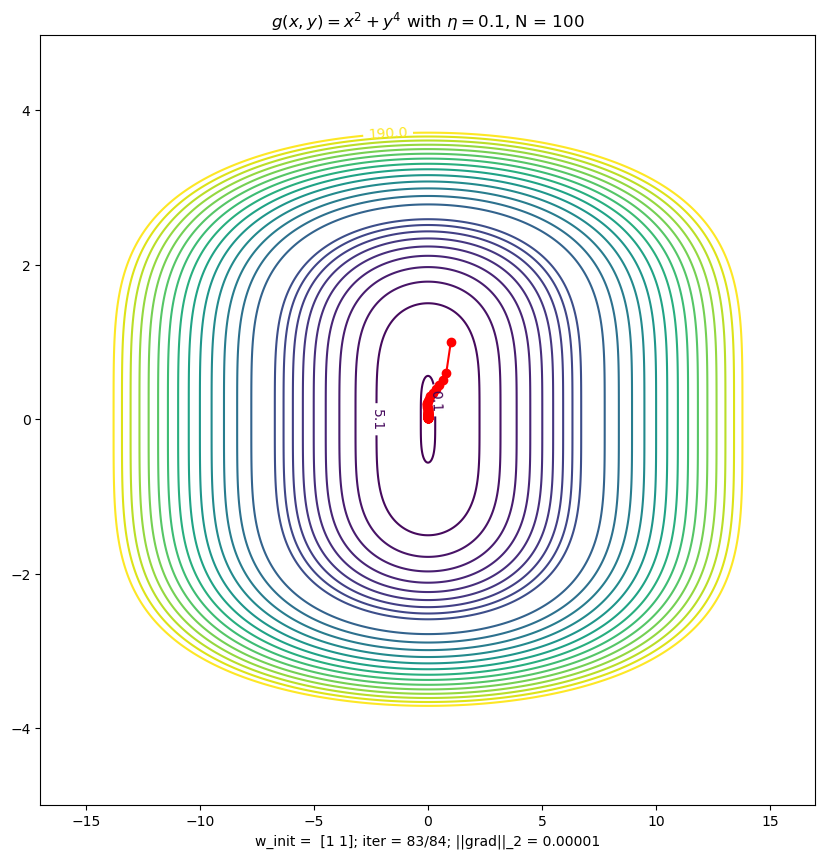

In [16]:
save_gif_6c(w_init=np.array([1, 1]))
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Accelerated gradient descent did not converge after 100 iterations.
100


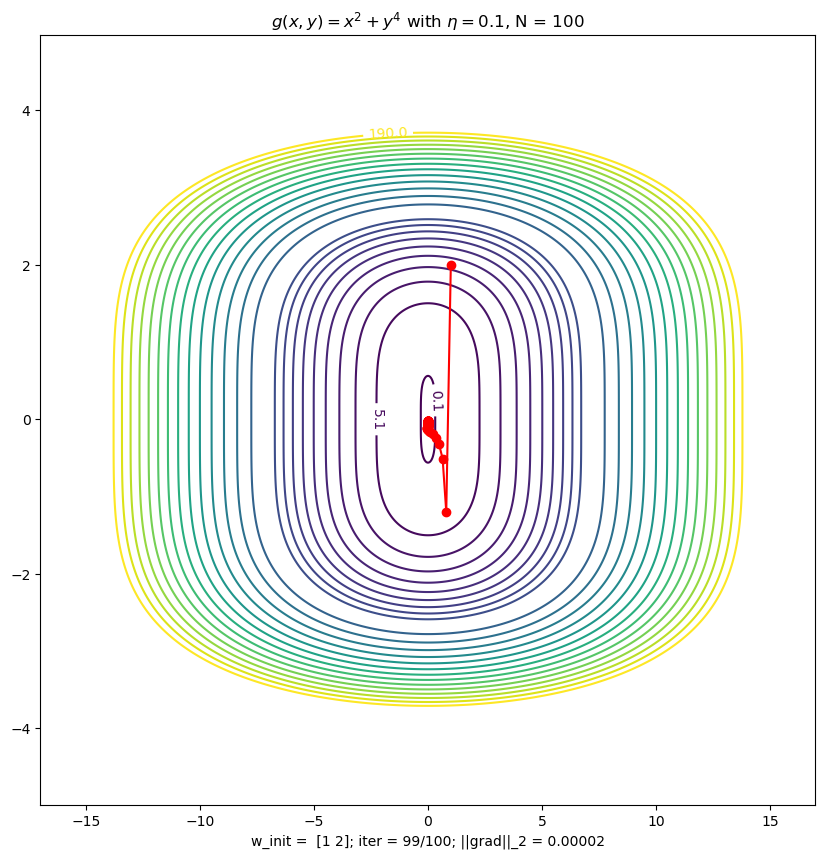

In [17]:
save_gif_6c(w_init=np.array([1, 2]))
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Found minimum.
61


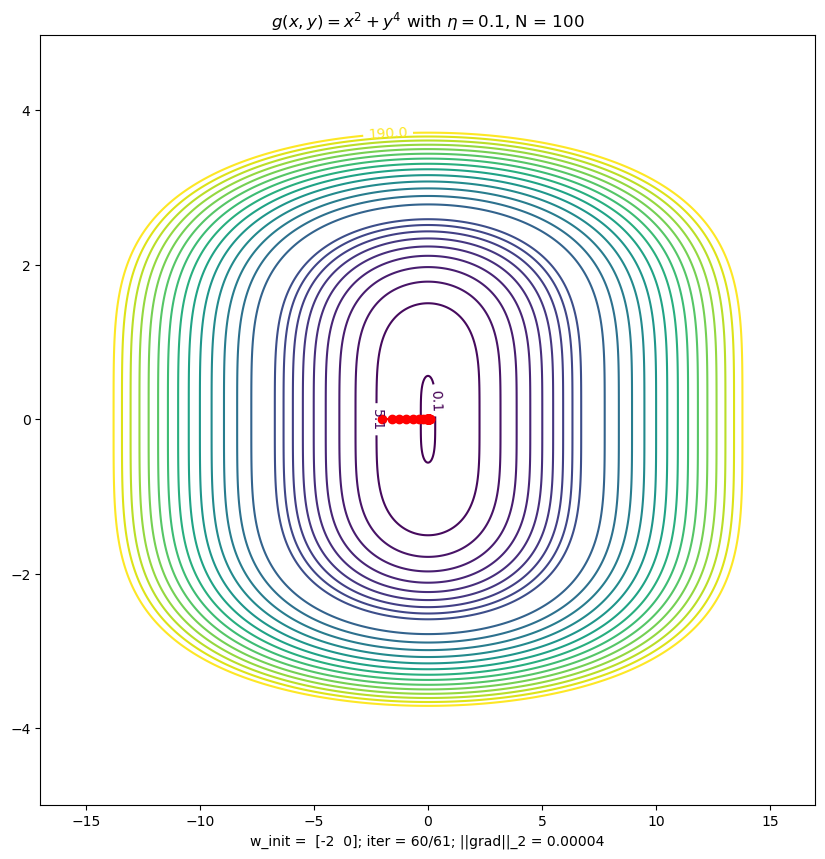

In [18]:
save_gif_6c(w_init=np.array([-2, 0]))
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Accelerated gradient descent did not converge after 100 iterations.
100


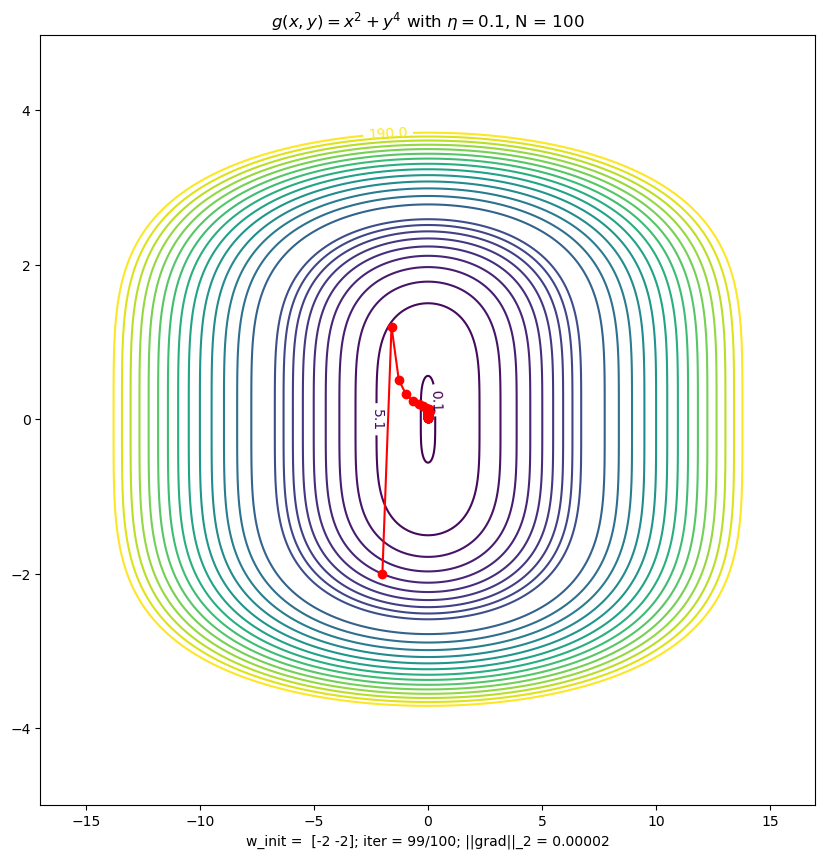

In [19]:
save_gif_6c(w_init=np.array([-2, -2]))
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Accelerated gradient descent did not converge after 100 iterations.
100


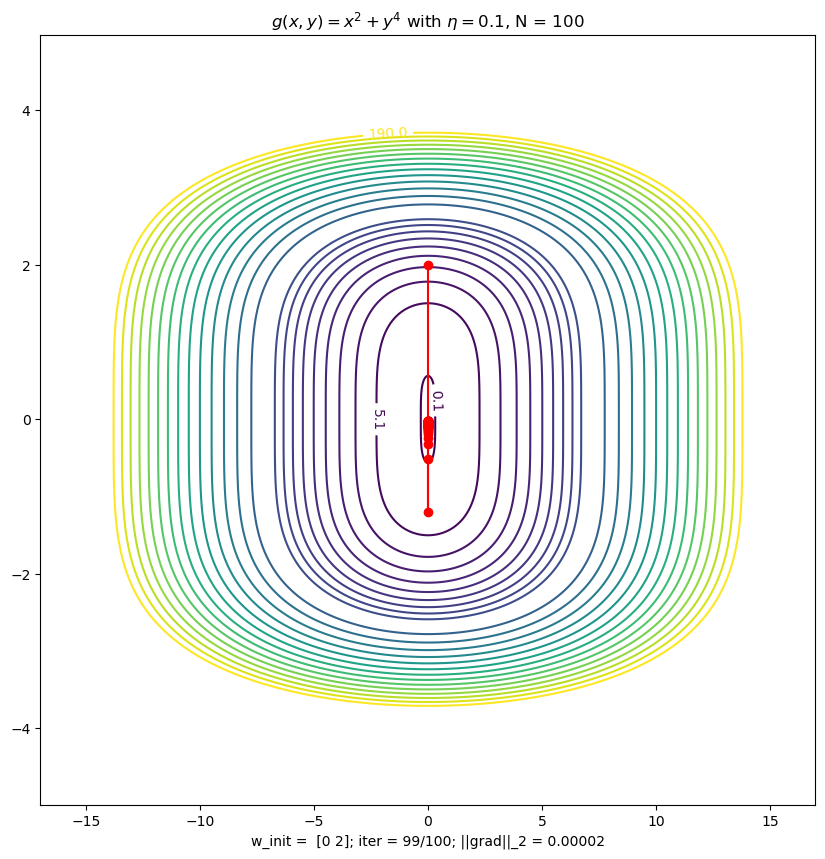

In [20]:
save_gif_6c(w_init=np.array([0, 2]))
plt.show()